# 02 - Limpieza y EDA

Objetivo:
- Cargar el dataset con target (`pts_next_season`)
- Limpiar y preparar variables
- EDA básica (distribuciones, correlaciones)
Salida:
- `data/processed/nba_final.csv`

## Imports y carga

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)

DATA_PROCESSED = Path("../data/processed")
df = pd.read_csv(DATA_PROCESSED / "nba_clean_with_target.csv")

df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,season_start,pts_next_season
0,419,A.C. Green,DAL,33.0,205.74,102.05820,Oregon State,USA,1985,1,23,83,7.2,7.9,0.8,-8.0,0.100,0.207,0.119,0.523,0.045,1996-97,1996,7.3
1,667,A.C. Green,DAL,34.0,205.74,102.05820,Oregon State,USA,1985,1,23,82,7.3,8.1,1.5,-7.2,0.090,0.196,0.118,0.496,0.074,1997-98,1997,4.9
2,1006,A.C. Green,DAL,35.0,205.74,102.05820,Oregon State,USA,1985,1,23,50,4.9,4.6,0.5,-5.6,0.097,0.179,0.148,0.441,0.043,1998-99,1998,5.0
3,1626,A.C. Green,LAL,36.0,205.74,102.05820,Oregon State,USA,1985,1,23,82,5.0,5.9,1.0,8.1,0.089,0.179,0.111,0.482,0.058,1999-00,1999,4.5
4,1970,A.J. Guyton,CHI,23.0,185.42,81.64656,Indiana,USA,2000,2,32,33,6.0,1.1,1.9,-12.4,0.018,0.053,0.169,0.495,0.198,2000-01,2000,5.4


## Inspeccion rápida

In [2]:
print("Shape:", df.shape)
df.info()

Shape: (10293, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10293 entries, 0 to 10292
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10293 non-null  int64  
 1   player_name        10293 non-null  object 
 2   team_abbreviation  10293 non-null  object 
 3   age                10293 non-null  float64
 4   player_height      10293 non-null  float64
 5   player_weight      10293 non-null  float64
 6   college            8773 non-null   object 
 7   country            10293 non-null  object 
 8   draft_year         10293 non-null  object 
 9   draft_round        10293 non-null  object 
 10  draft_number       10293 non-null  object 
 11  gp                 10293 non-null  int64  
 12  pts                10293 non-null  float64
 13  reb                10293 non-null  float64
 14  ast                10293 non-null  float64
 15  net_rating         10293 non-null  float64
 16  ore

In [3]:
df.isnull().sum().sort_values(ascending=False).head(15)

college         1520
Unnamed: 0         0
reb                0
season_start       0
season             0
ast_pct            0
ts_pct             0
usg_pct            0
dreb_pct           0
oreb_pct           0
net_rating         0
ast                0
pts                0
player_name        0
gp                 0
dtype: int64

## Limpieza mínima

In [4]:
df = df.drop(columns=["Unnamed: 0"])

In [5]:
df = df.drop(columns=["college"])

In [6]:
print("Duplicados:", df.duplicated().sum())

Duplicados: 0


## EDA rápido (Confirmar que el target tiene sentido)

In [7]:
df["pts_next_season"].describe()

count    10293.000000
mean         8.923113
std          6.142721
min          0.000000
25%          4.200000
50%          7.500000
75%         12.300000
max         36.100000
Name: pts_next_season, dtype: float64

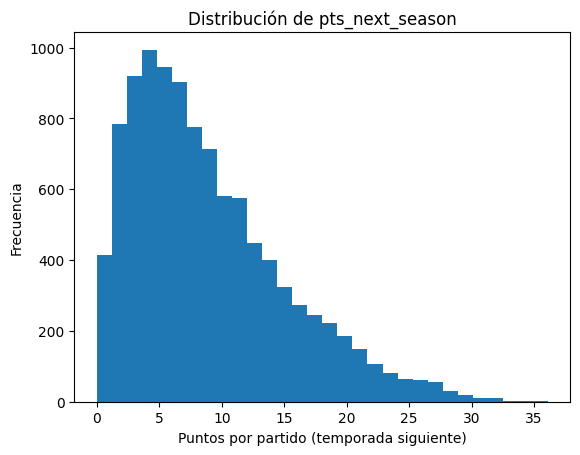

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["pts_next_season"], bins=30)
plt.title("Distribución de pts_next_season")
plt.xlabel("Puntos por partido (temporada siguiente)")
plt.ylabel("Frecuencia")
plt.show()

## Correlaciones

In [9]:
import numpy as np

num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr(numeric_only=True)["pts_next_season"].sort_values(ascending=False)
corr.head(10)

pts_next_season    1.000000
pts                0.856297
usg_pct            0.629909
ast                0.554340
reb                0.479327
gp                 0.384649
ast_pct            0.325376
ts_pct             0.275273
net_rating         0.187163
season_start       0.068445
Name: pts_next_season, dtype: float64

## Preparar Dataset final

In [10]:
df = df.drop(columns=["player_name", "season"])

## Guardar Dataser

In [11]:
df.to_csv("../data/processed/nba_final.csv", index=False)
print("Guardado nba_final.csv:", df.shape)

Guardado nba_final.csv: (10293, 20)
